----------------------------------------------------------------------------------------------------------------

# Data Science and Machine Learning Fundamentals 
## Disciplina C318 - Engenharia da Computação e Engenharia de Software

----------------------------------------------------------------------------------------------------------------

### Research Notebook - End-to-End Machine Learning Project

### Project Structure Steps:
- **Step 1** : Importação de bibliotecas e frameworks
- **Step 2** : Importação e informações sobre os dados
- **Step 3** : Importação de dados com Google Bigquery
- **Step 4** : Exploração inicial de dados
- **Step 5** : Métodos de amostragem
  - Métodos de amostragem aleatória baseados em permutação
  - Métodos de amostragem aleatória baseados em identificadores únicos
  - Métodos de amostragem aleatória com scikit-learn
  - Métodos de amostragem aleatória baseados em estratificação
  - Proporções e representatividade dos métodos de amostragem aleatória
- **Step 5** : Análise de dados - SQL Business Questions
- **Step 6** : Análise exploratória de dados
  - Visualizacão de dados
  - Análise estatística dos dados - correlações
  - Engenharia de features (combinação de atributos)
- **Step 6** : Preparação dos dados para modelagem 
  - Princípios de design do scikit-learn
  - Limpeza de dados (data cleaning)
  - Detecção e análise de outliers nos dados 
  - Processamento de features categóricas com codificadores (encoding)
  - Normalizações e padronizações (Feature Scaling)
- **Step 7** : Pipelines e transformações customizadas 
  - Transformações customizadas (custom transformers)
  - Pipelines de transformação (transformation pipelines) 
- **Step 8** : Machine Learning
  - Seleção de modelos e treinamento (model bulding)
  - Análise de desempenho (model testing)
  - Otimização de hiperparâmetros

----------------------------------------------------------------------------------------------------------------

### **Step 1** : Importação de bibliotecas e frameworks

----------------------------------------------------------------------------------------------------------------

In [6]:
##############################################################################
                 # Importação de bibliotecas e frameworks # 

import pandas as pd
import pandas_gbq
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.io as pio
pio.renderers.default='browser'
template = 'plotly' # "plotly", "plotly_white", "plotly_dark", "ggplot2", "seaborn", "simple_white"
import streamlit as st
import klib
import os
import tarfile
import urllib
import sklearn
import urllib.request
from   summarytools import dfSummary
from   zlib import crc32
from   pathlib import Path
from   google.cloud import bigquery
from   google.oauth2 import service_account
from   summarytools import dfSummary
from   sklearn.model_selection import train_test_split

#### Package Versions Check

In [8]:
import pkg_resources
def check_package_version(package_name):
    try:
        version = pkg_resources.get_distribution(package_name).version
        return f"{package_name} version: {version}"
    except pkg_resources.DistributionNotFound:
        return f"{package_name} is not installed"

# Check the version of google-cloud package
package_name = "klib"
print(check_package_version(package_name))

klib version: 1.3.1


C:\Users\diogoantonio\AppData\Local\Temp\ipykernel_3364\237968033.py:1: DeprecationWarning:

pkg_resources is deprecated as an API. See https://setuptools.pypa.io/en/latest/pkg_resources.html



----------------------------------------------------------------------------------------------------------------

### **Step 2** : Importação e informações sobre os dados
    - Informações sobre o dataset
         - 1. longitude: A measure of how far west a house is; a higher value is farther west
         - 2. latitude: A measure of how far north a house is; a higher value is farther north
         - 3. housingMedianAge: Median age of a house within a block; a lower number is a newer building
         - 4. totalRooms: Total number of rooms within a block
         - 5. totalBedrooms: Total number of bedrooms within a block
         - 6. population: Total number of people residing within a block
         - 7. households: Total number of households (domicílios familiares), a group of people residing within a home unit, for a block
         - 8. medianIncome: Median income for households within a block of houses (measured in tens of thousands of US Dollars)
         - 9. medianHouseValue: Median house value for households within a block (measured in US Dollars)
         - 10. oceanProximity: Location of the house w.r.t ocean/sea

----------------------------------------------------------------------------------------------------------------

In [3]:
##############################################################################
                 # Importação e informações sobre os dados # 
    
# Função para importação dos dados (a partir do Github)
def load_housing_data():
    """
    Função para download e armazenamento do conjunto de dados
    """
    tarball_path = Path("datasets/housing.tgz")
    if not tarball_path.is_file():
        Path("datasets").mkdir(parents=True, exist_ok=True)
        url = "https://github.com/ageron/data/raw/main/housing.tgz"
        urllib.request.urlretrieve(url, tarball_path)
        with tarfile.open(tarball_path) as housing_tarball:
            housing_tarball.extractall(path="datasets")
    return pd.read_csv(Path("datasets/housing/housing.csv"))

df = load_housing_data()
df

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY
...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,INLAND
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,INLAND
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,INLAND
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,INLAND


----------------------------------------------------------------------------------------------------------------

### **Step 3** : Importação de dados com Google Bigquery
 - How does Bigquery Works?
     - https://cloud.google.com/bigquery/docs/storage_overview

----------------------------------------------------------------------------------------------------------------

----------------------------------------------------------------------------------------------------------------

### **Step 4** : Exploração inicial dos dados

----------------------------------------------------------------------------------------------------------------

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


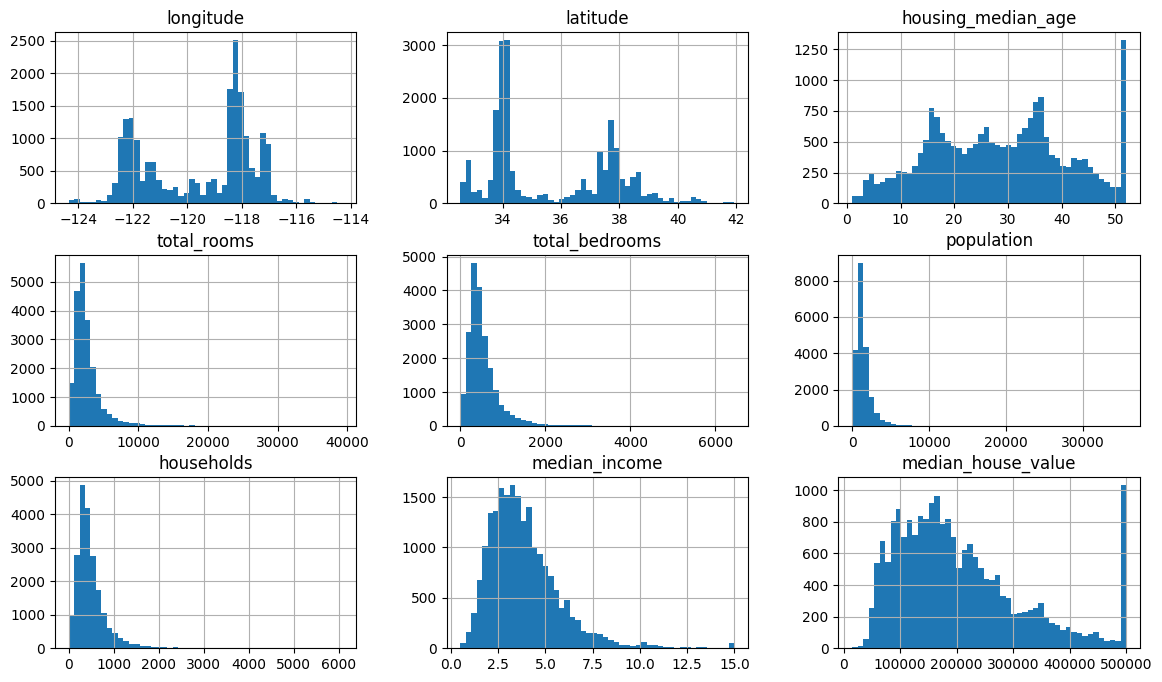

Large dataset detected, using 10000 random samples for the plots. Summary statistics are still based on the entire dataset.
Large dataset detected, using 10000 random samples for the plots. Summary statistics are still based on the entire dataset.
Large dataset detected, using 10000 random samples for the plots. Summary statistics are still based on the entire dataset.


<Axes: xlabel='median_income', ylabel='Density'>

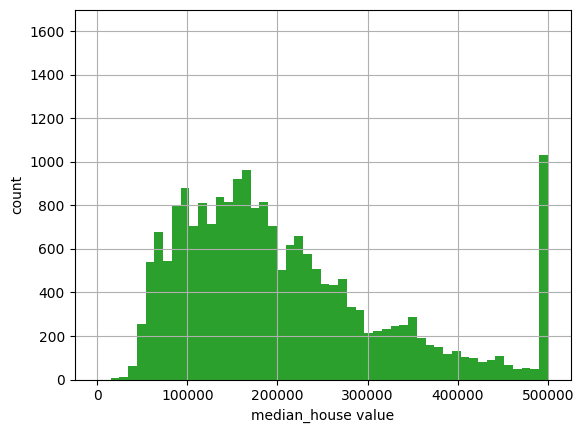

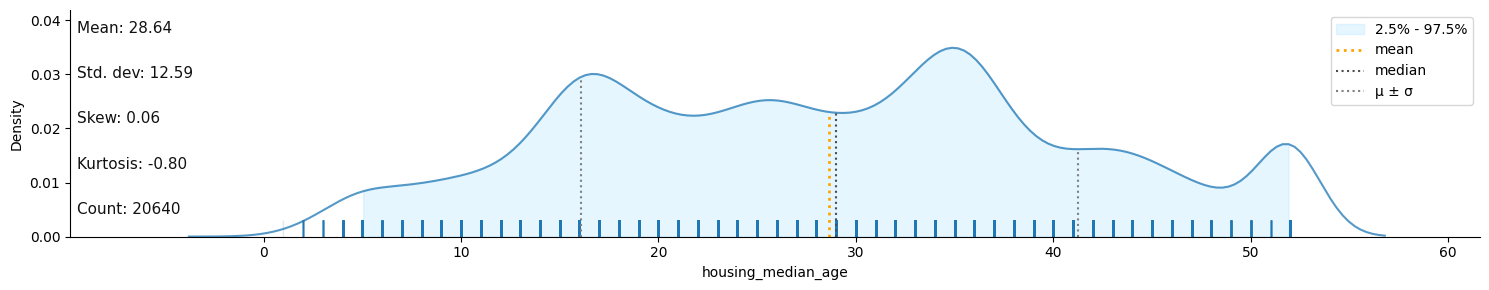

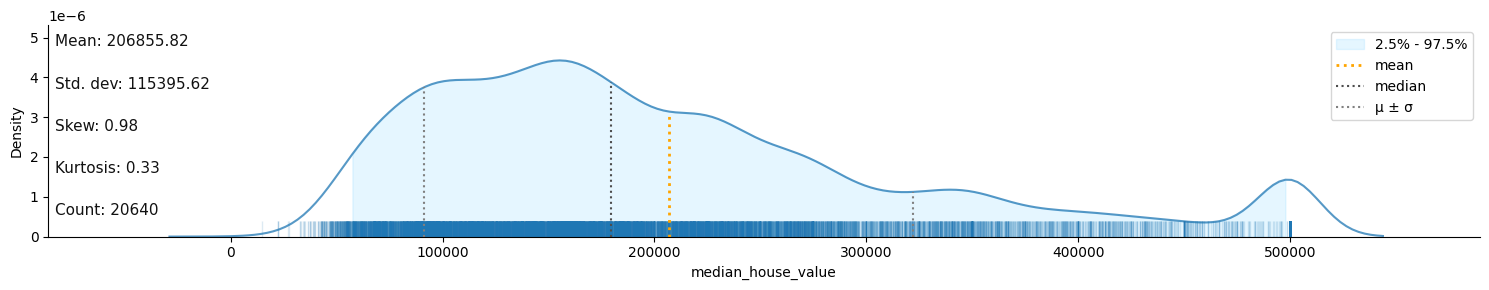

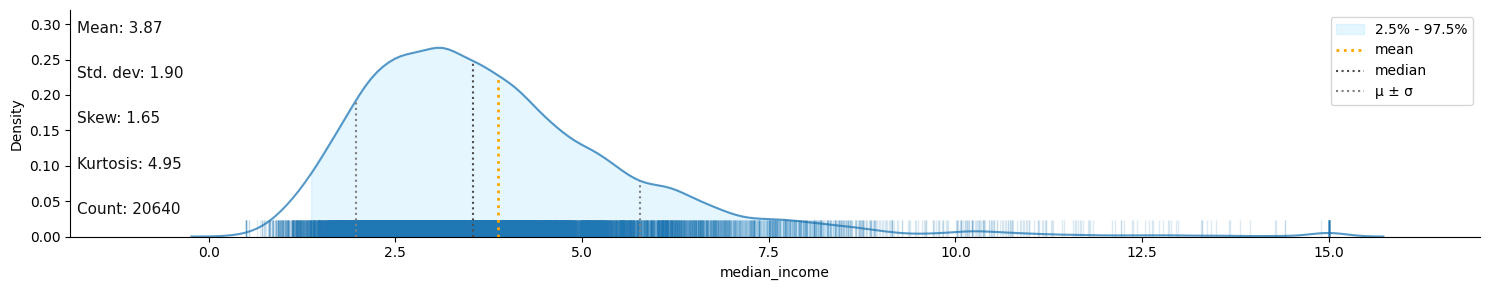

In [4]:
##############################################################################
                  # Exploração incial dos dados #

# Acessando e Manipulando Dataframes com Pandas
df.info()
df_describe = df.describe()

# Indexação está relacionada com a referência de elementos em um objeto iterável pela posição
# Slicing consiste no fatiamento de um subconjunto de dados de um objeto iterável

# Indexação por rótulo - selecionando uma série Pandas a partir do dataframe
# df['housing_median_age']

# Indexação por rótulo - selecionando mais de uma série Pandas a partir do dataframe
# df[['housing_median_age', 'median_income']]

# Usando a notação ponto (.) para acesso à series de um dataframe
# df.housing_median_age
#
# Adicionando uma nova série (coluna) ao dataframe Pandas
# df['new_feature'] = df['housing_median_age']**2

# Tip1: o nome de uma série Pandas se torna um atributo do dataframe
# Tip2: quando existem espaços nos nomes das séries/colunas (features), não podemos usar a notação (.)
# Tip3: é recomendável não usar nomes de séries/colunas (features) iguais à métodos/atributos build-in do Python (e.g., shape)
# Tip4: é recomendável usar a notação [] para criação de novas features (colunas) no dataframe

# Verificando a variável categórica - ocean_proximity
grupos = df["ocean_proximity"].value_counts()
grupos

# Visualizando histogramas relacionados com todas as variáveis do dataframe
df.hist(bins=50, figsize=(14,8))
plt.show()

# Visualizando histogramas das variáveis - características - features
df['housing_median_age'].hist(bins = 50)
plt.xlabel('housing_median_age')
plt.ylabel('count')

df['median_income'].hist(bins = 50)
plt.xlabel('median_income')
plt.ylabel('count')

df['median_house_value'].hist(bins=50)
plt.xlabel('median_house value')
plt.ylabel('count')

# https://klib.readthedocs.io/en/stable/
klib.dist_plot(df['housing_median_age'])
klib.dist_plot(df['median_house_value'])
klib.dist_plot(df['median_income'])

# ----------------------------------------------------------------------------
# Análise conduzida a partir dos histogramas 

# i) A mediana salarial (feature) não aparenta estar expressa em dólares. 
# Outro ponto de relevância é que exitem limites (superiores e inferiores)
# Fazer essa checagem é importante, bem como informações de escala
# Ex: median income de 3 significa, de fato, 30,000 dólares

# ii) A idade mediana das casas nos distritos também aparenta ter sido 
# limitada. O mesmo se aplica à variável median_house_vale (importante)

# Nesse caso (ii) é fundamental checar, junto ao time/cliente, se essa limitação
# valores da variável é um problema ou não. Se esse for o caso, podemos:
# => coletar de forma apropriada os valores que foram limitados
# => remove esses dados (distritos) do conjunto de dados para treino/teste

# iii) Presença de escalas diferentes para as features. Nesse caso, podemos
# conduzir processamentos/transformações que nos ajudam a resolver o impacto
# negativo causado no treinamento pelas escalas diferentes das variáveis

# iv) O comparativo dos histogramas estimados com as distribuições de probabilidade
# conhecidas é um ponto de relevância para inúmeros modelos de ML que possuem
# otimalidade (em termos de treinamento) condicionada à distribuição dos dados
# ----------------------------------------------------------------------------

----------------------------------------------------------------------------------------------------------------

### **Step 5** : Métodos de amostragem aleatória
 - Amostragem aleatória baseados em permutação
 - Amostragem aleatória baseados em identificadores únicos 
 - Amostragem aleatória simples com scikit-learn 
 - Amostragem aleatória baseados em estratificação 
 - Proporções e representatividade dos métodos de amostragem aleatória

----------------------------------------------------------------------------------------------------------------

In [5]:
##############################################################################
              # Métodos de amostragem baseados em permutação #

# Criação de conjuntos de dados de treino e teste
def shuffle_and_split_data(df, test_ratio):
    np.random.seed(44)
    rand_indx  = np.random.permutation(len(df))  # criação de índices aleatórios (tamanho do df)
    test_size  = int(len(df) * test_ratio)       # tamanho do conjunto de teste
    test_indx  = rand_indx[0:test_size]          # índices do conjunto de teste
    train_indx = rand_indx[test_size:]           # índices do conjunto de treino    
    # Uso de índices para captura dos dados do df - formando treino/test set
    traning_set = df.iloc[train_indx]
    test_set    = df.iloc[test_indx]
    return traning_set, test_set

train_set, test_set = shuffle_and_split_data(df, 0.3)
len(train_set)
len(test_set)
test_set.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
20127,-119.74,34.35,34.0,1664.0,292.0,705.0,257.0,5.0000,329400.0,NEAR OCEAN
18256,-119.99,38.94,24.0,1216.0,289.0,421.0,185.0,3.1625,103600.0,INLAND
10376,-117.25,32.99,10.0,4926.0,749.0,1478.0,634.0,7.4720,439900.0,NEAR OCEAN
4109,-117.80,33.85,16.0,4151.0,637.0,1558.0,604.0,5.8060,304900.0,<1H OCEAN
8169,-117.13,32.79,35.0,1362.0,243.0,698.0,255.0,3.6458,173800.0,NEAR OCEAN


In [6]:
##############################################################################
         # Método de amostragem baseado em identificadores únicos #
    
# Principal razão: evitar que modelos enxerguem o dataset completo ao longo de
# diversas iterações

# Nós adicionamos um identificador único aos dados para para decidir se um
# registro (linha) pode ou não entrar no conjunto de teste. 
# Com isso, podemos computar um hash (usando a função crc32) para cada identificador
# e permitir a entrada desse identificador (registro) se o seu hash é menor
# que 20% (threshold) que o hash máximo. 

# This ensures that the test set will remain consistent across multiple runs, 
# even if you refresh the dataset. 
# The new test set will contain 20% of the new instances, but it will 
# not contain any instance that was previously in the training set.

# Função checagem do conjunto de teste
def is_id_in_test_set(identifier, test_ratio):
    return crc32(np.int64(identifier)) < test_ratio * 2**32

def split_data_with_id_hash(data, test_ratio, id_column):
    # Captura de cada id do dataframe
    ids = data[id_column]
    # Checagem de cada id, de acordo com crc32
    in_test_set = ids.apply(lambda id_: is_id_in_test_set(id_, test_ratio))
    df_nTest = data.loc[~in_test_set]
    df_Test  = data.loc[in_test_set]
    return df_nTest, df_Test

df.index[100]
np.int64(df.index[100])
crc32(np.int64(df.index[100]))
2**32

# Geração de índice único no dataframe df (reset_index), incluindo coluna
df_id = df.reset_index()

# Usando a função split_train_test_by_id para geração do conjunto de teste com
# checagem a partir dos índices únicos adicionados ao dataframe
train_set_id, teste_set_id = split_data_with_id_hash(df_id, 0.2, 'index')
train_set_id
teste_set_id

,index,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
2,2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
5,5,-122.25,37.85,52.0,919.0,213.0,413.0,193.0,4.0368,269700.0,NEAR BAY
12,12,-122.26,37.85,52.0,2491.0,474.0,1098.0,468.0,3.0750,213500.0,NEAR BAY
16,16,-122.27,37.85,52.0,1966.0,347.0,793.0,331.0,2.7750,152500.0,NEAR BAY
23,23,-122.27,37.84,52.0,1688.0,337.0,853.0,325.0,2.1806,99700.0,NEAR BAY
...,...,...,...,...,...,...,...,...,...,...,...
20615,20615,-121.54,39.08,23.0,1076.0,216.0,724.0,197.0,2.3598,57500.0,INLAND
20617,20617,-121.53,39.06,20.0,561.0,109.0,308.0,114.0,3.3021,70800.0,INLAND
20622,20622,-121.44,39.00,20.0,755.0,147.0,457.0,157.0,2.4167,67000.0,INLAND
20626,20626,-121.43,39.18,36.0,1124.0,184.0,504.0,171.0,2.1667,93800.0,INLAND


In [7]:
##############################################################################
        # Métodos de amostragem aleatória com scikit-learn #
    
# from sklearn.model_selection import train_test_split
# Função do scikit-learn train_test_split
train_set, test_set = train_test_split(df, test_size = 0.2, random_state = 42)
train_set
test_set

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
20046,-122.38,40.67,10.0,2281.0,444.0,1274.0,438.0,2.2120,65600.0,INLAND
3024,-118.37,33.83,35.0,1207.0,207.0,601.0,213.0,4.7308,353400.0,<1H OCEAN
15663,-117.24,32.72,39.0,3089.0,431.0,1175.0,432.0,7.5925,466700.0,NEAR OCEAN
20484,-118.44,34.05,18.0,4780.0,1192.0,1886.0,1036.0,4.4674,500001.0,<1H OCEAN
9814,-118.44,34.18,33.0,2127.0,414.0,1056.0,391.0,4.3750,286100.0,<1H OCEAN
...,...,...,...,...,...,...,...,...,...,...
15362,-121.92,40.52,13.0,4581.0,881.0,1799.0,734.0,2.2993,99500.0,INLAND
16623,-122.08,37.68,26.0,2607.0,682.0,1401.0,607.0,2.6563,184100.0,NEAR BAY
18086,-119.00,35.39,42.0,2839.0,516.0,1203.0,487.0,3.7708,79400.0,INLAND
2144,-117.92,33.63,39.0,1469.0,226.0,553.0,225.0,7.8496,490800.0,<1H OCEAN


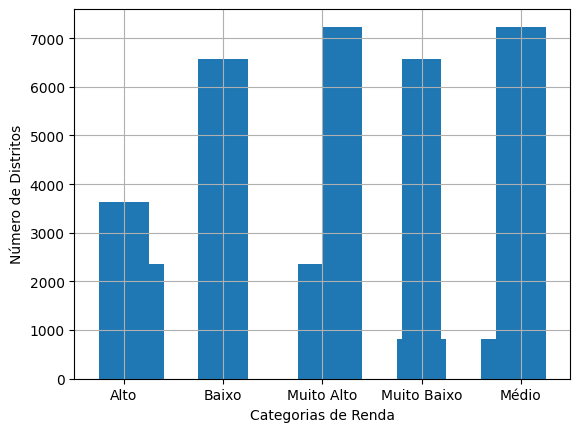

In [8]:
##############################################################################
       # Método de amostragem aleatória baseados em estratificação #
    
# Criação de estratos dos salário (renda) mediana dos diversos distritos
# Definição dos stratos
stratos_names   = ['Muito Baixo', 'Baixo', 'Médio', 'Alto', 'Muito Alto']
stratos_valores = [0, 1.5, 3, 4.5, 6, np.inf] 
df['income_categorical'] = pd.cut(df['median_income'], 
                           bins   = stratos_valores,
                           labels = stratos_names)

df['income_categorical'] = df['income_categorical'].astype(object)
df['income_categorical'].hist(bins = 10)

df['income_categorical'].value_counts().sort_index().plot.bar(rot=0,grid=True)
plt.xlabel('Categorias de Renda')
plt.ylabel('Número de Distritos')

# Amostragem Estratificada com Sckit-Learn 
from sklearn.model_selection import StratifiedShuffleSplit
# Função StratifiedShuffleSplit - divisão aleatória por estratificação
split = StratifiedShuffleSplit(n_splits = 1, test_size= 0.2, random_state = 42)
# Aplicação da divisão por estratos na feature categórica do dataframe
strat_split = split.split(df, df['income_categorical'])
# Loop sobre os índices do conjunto estratificado contemplando treino e teste
for train_index, test_index in strat_split:
    strat_train_set = df.loc[train_index]
    strat_test_set  = df.loc[test_index]

In [9]:
##############################################################################
# Proporções e representatividade dos métodos de amostragem aleatória #
    
# ==========================================
# Proporção da Amostragem e Representavidade

# Proporção da variável categórica no conjunto de dados original
proportion_original_dataset = df['income_categorical'].value_counts()/len(df)

# Proporção - Amostragem aleatória simples - scikit-learn
random_train_set, random_test_set = train_test_split(df, test_size = 0.2, random_state = 42)
random_counts = random_test_set['income_categorical'].value_counts()
# random_counts
proportion_random_test = random_counts/len(random_test_set)
# proportion_random_test

# Proporção - Amostragem aleatória estratficada - scikit-learn
strat_counts = strat_test_set['income_categorical'].value_counts()
# strat_counts
proportion_strat_test = strat_counts/len(strat_test_set)
# proportion_strat_test

# Comparações de proporções (simples e estratificada em relação à proporção original)
print(proportion_original_dataset)
print(proportion_random_test)
print(proportion_strat_test)

income_categorical
Médio          0.350581
Baixo          0.318847
Alto           0.176308
Muito Alto     0.114438
Muito Baixo    0.039826
Name: count, dtype: float64
income_categorical
Médio          0.345203
Baixo          0.307413
Alto           0.184109
Muito Alto     0.120882
Muito Baixo    0.042393
Name: count, dtype: float64
income_categorical
Médio          0.350533
Baixo          0.318798
Alto           0.176357
Muito Alto     0.114341
Muito Baixo    0.039971
Name: count, dtype: float64


----------------------------------------------------------------------------------------------------------------

### **Step 5** : Análise de dados - SQL Business Questions

----------------------------------------------------------------------------------------------------------------

#### SQL-Business Questions 
- 1) BUSINESS QUESTION 1 - WHICH REGION NEAR THE OCEAN (ocean_proximity) HAS THE GREATEST VARIATION IN HOUSE PRICES?

- 2) BUSINESS QUESTION 2 - WE NEED TO FOCUS ON SPECIFIC HOUSES THAT ARE WELL ABOVE THE AVERAGE VALUE OF A REGION. FIND OUT WHICH HOUSES HAVE A PRICE HIGHER THAN 3 TIMES THE VARIATION IN THAT RESPECTIVE AREA

----------------------------------------------------------------------------------------------------------------

### **Step 6** : Análise exploradória de dados
  - Visualizacão de dados
  - Análise estatística dos dados - correlações
  - Engenharia de features (combinação de atributos)

----------------------------------------------------------------------------------------------------------------

In [10]:
# Criando uma cópia do dataset de treino, considerando a amostragem por estratos
housing = strat_train_set.copy()

<Axes: xlabel='longitude', ylabel='latitude'>

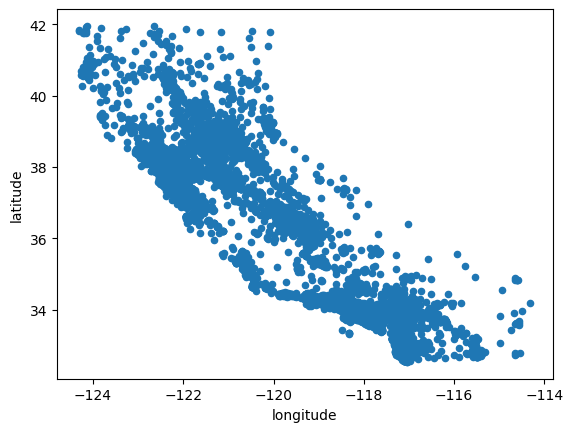

In [11]:
##############################################################################
             # Análise exploratória de dados - visualização #
    
housing.plot(kind = 'scatter', x = 'longitude', y = 'latitude')

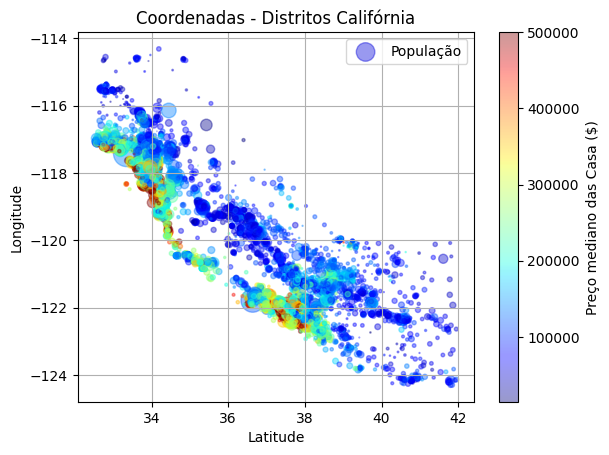

In [12]:
##############################################################################
             # Análise exploratória de dados - visualização #
    
# Gráfico scatter plot (função plt) com size control e colorbar
x       = housing['latitude']
y       = housing['longitude']
sizes   = housing['population']/100
prices  = housing['median_house_value']
scatter = plt.scatter(x, y, alpha = 0.4, 
            s = sizes,  label  = 'População', 
            c = prices, cmap='jet')
plt.xlabel('Latitude')
plt.ylabel('Longitude')
plt.title('Coordenadas - Distritos Califórnia')
plt.colorbar(label='Preço mediano das Casa ($)')
plt.grid()
plt.legend()

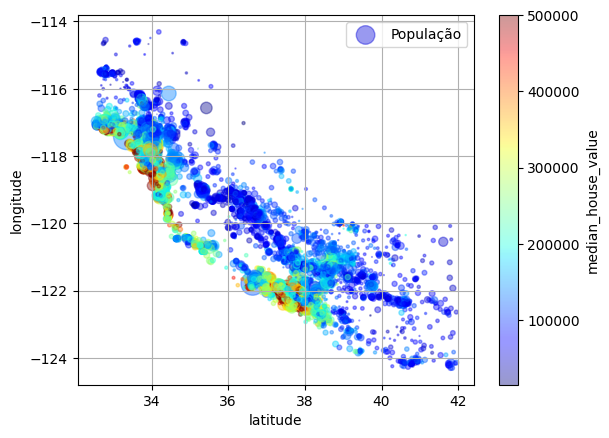

In [13]:
# Gráfico scatter plot (função plt) com size control e colorbar
housing.plot(kind = 'scatter',x = "latitude", y = "longitude", alpha = 0.4, 
            s = housing['population']/100, label = 'População', 
            c = 'median_house_value', 
            cmap = plt.get_cmap("jet"), colorbar = True)
plt.legend()
plt.grid()


In [14]:
##############################################################################
       # Análise exploratória de dados - visualização #
    
# Plotly Visualization - Lat ant Long points
fig_plotly_target = px.scatter(housing, 
                               x = "longitude", 
                               y = "latitude", 
                               color = "median_house_value", 
                               color_continuous_scale=px.colors.sequential.Jet,
                               size = "population", size_max=60)

fig_plotly_target.update_layout(template=template)
fig_plotly_target.update_layout(title="Exploratory Data Analysis - Geoplot (Median House Values)",
                                xaxis_title="Longitude (Long)",
                                yaxis_title="Latitude  (Lat)",
                                legend_title="Median House Values",
                                # width=500,
                                # height=700,
                                font=dict(size=15)
                               )

In [15]:
dfSummary(housing)

No,Variable,Stats / Values,Freqs / (% of Valid),Graph,Missing
1,longitude[float64],Mean (sd) : -119.6 (2.0)min < med < max:-124.3 < -118.5 < -114.3IQR (CV) : 3.8 (-59.7),823 distinct values,"<img src = ""data:image/png;base64, iVBORw0KGgoAAAANSUhEUgAAAKoAAABGCAYAAABc8A97AAAAOXRFWHRTb2Z0d2FyZQBNYXRwbG90bGliIHZlcnNpb24zLjguMiwgaHR0cHM6Ly9tYXRwbG90bGliLm9yZy8g+/7EAAAACXBIWXMAAA9hAAAPYQGoP6dpAAAC0UlEQVR4nO3du47aQBSA4TNhIQYis4gEOlqKSBSUPEQeNo+QgpaGlorO4iIjHFhuTpUokfZmDw5zxv/Xmx1p/0X27GEwaZoK4LoP914A8B4P914A/mWMqYtIzeIljmma7m+1HlcQqkOMMfVOp/MtDMN23tfYbrcbY8x332IlVLfUwjBsj8fjfavVOmS9OI7jYDKZtFerVU1ECBXFarVah263+zPn5fWbLsYRPExBBUKFCoQKFQgVKhAqVCBUqECoUIFQoQKhQgVChQqEChUIFSoQKlRwenrKcojYywHisnI2VNshYl8HiMvK2VDFYojY5wHisnI5VBGxGiL2coC4rHiYggqEChUIFSoQKlQgVKhAqFCBUKECoUIFQoUKhAoVCBUqECpUcH4oRSOLOdrwer1Wb70eHxDqjdnM0Z5Op+ByuXw9HA4/RCTvsZNeItTbyz1Hu1gs2rPZrHE+nytFLU4rQi1InjnazWbDDO0LeJiCCoQKFQgVKhAqVCBUqECoUIHtKc9cLpeqiITGmDyXO3u6DKF6JEmS6ul0Gvb7/UqlUsn8zX8uny5DqB45Ho8PQRA0RqPRodfrbbJc6/rpMoTqoWaz6d3pMjxMQYVC31Etj41k5A1/FBaq7bGRjLzhb0W+o1p997ztyJvlNo2Iw1s1ZVT4w1TeYyNtRt5st2lE3N6qKSMvn/pttmlE3N+qKSMvQ/3NYptGxOGtmjLyOlQbFve47FYUgFCfYXOPy25FMQj1GTb3uHxArxiE+oo897h8QK8Y/AsVKhAqVCBUqECoUIFQoQKhQgVChQpv7qNy1md5uDwa+WqonPVZHq6PRr71jloLw7A9HA6lXq8/ZXnh5XIZzOfzRhzHzSiKjlkXttvtAhGRJEmCKIoa/+vae/7se657vV5/CoKgMRgMzOPjY6bftYjIfr//OJ1Ov6xWq8/GmG3W60XkKU3TF/9AfgEODHNVuu5HdAAAAABJRU5ErkJggg=="">",0(0.0%)
2,latitude[float64],Mean (sd) : 35.6 (2.1)min < med < max:32.5 < 34.2 < 42.0IQR (CV) : 3.8 (16.7),851 distinct values,"<img src = ""data:image/png;base64, iVBORw0KGgoAAAANSUhEUgAAAKoAAABGCAYAAABc8A97AAAAOXRFWHRTb2Z0d2FyZQBNYXRwbG90bGliIHZlcnNpb24zLjguMiwgaHR0cHM6Ly9tYXRwbG90bGliLm9yZy8g+/7EAAAACXBIWXMAAA9hAAAPYQGoP6dpAAACtElEQVR4nO3cv27aUBiG8e+UEDkQ2SAisnllqNSBMUvvoBfbtVuRskfKHWSLRPgj3FCIcadsNIFzcOLXfn77AUs8wuag77iiKAyoui+ffQHAIc7KfHHn3IWZnQe8xKYoiudTXQ90lRaqc+5iMBj8iOO47/say+Vy5pz7Sawo8xv1PI7j/s3NzXOSJOtjFy8Wi+j29rY/nU7PzYxQG67UW7+ZWZIk6+Fw+Mdz+cVJLway+DEFCYQKCYQKCYQKCYQKCYQKCYQKCYQKCYQKCYQKCYQKCYQKCYQKCYQKCYQKCYQKCYQKCYQKCYQKCYQKCYQKCYQKCYQKCYQKCYQKCYQKCYQKCYQKCaUfktZEgefCcibsHoR6YqHnwnIm7H6Eenre58JyJuz/EWpJAs6F5UzYPfgxBQmECgmECgmECgmECgmECgmECgmECgmECgmECgmECgmECgmECgmECgmECgmECgmECgmECgnvjqIETFTGu92u7bGu0fI8b5tZ7JzzfYlaTrG+GWrIROV2u43yPP+6Xq9/m5nP7FDjZFnW3m6339I0bbVaraMGA1/VdYr1vW9U74nKh4eH/v39fefl5aUVcH2NstlszqIo6ozH4/X19fXs2PV1nmI9aArVZ6JyNptJT1N+5iNPt9v1nWA1q+kUK+PSe/DIUz2Euh+PPBVDqG9o4iNPVVU61MCtmlpu0zRVZUMN3aqp6zZNU1U21JCtmjpv07ynrnehyob6ynerJs/z2Pw/MMl/1ep8F6p8qD5CPzDVLabQu9BkMhlOp9Mr59zS9xLKiryWoYb+w6O+xeRzFzrF37fz+XzlnPtlZj7r34z8oFAXi0V07LuuVqvIzCzLsujx8bHzketf14YKee+PXhu6/unp6TKKos5oNHK9Xu/vse89n88v7+7uvqdpelXGY8c/Xq59mB7oG4sAAAAASUVORK5CYII="">",0(0.0%)
3,housing_median_age[float64],Mean (sd) : 28.6 (12.6)min < med < max:1.0 < 29.0 < 52.0IQR (CV) : 19.0 (2.3),52 distinct values,"<img src = ""data:image/png;base64, iVBORw0KGgoAAAANSUhEUgAAAKoAAABGCAYAAABc8A97AAAAOXRFWHRTb2Z0d2FyZQBNYXRwbG90bGliIHZlcnNpb24zLjguMiwgaHR0cHM6Ly9tYXRwbG90bGliLm9yZy8g+/7EAAAACXBIWXMAAA9hAAAPYQGoP6dpAAACn0lEQVR4nO3cQYriQBSA4VeTVqJCggi68wIDvXDpIeawc4RZeAJv4E4QiZjpYIzpXdMNPWpSqUm94v/2MQF/uiuVZ0xd1wL47kffFwA846XvC8BXxpiRiAwtPuJS1/VbV9fjC0L1iDFmNJvNfiVJMm37GafT6WiM+R1arITql2GSJNP1ev2WpmnR9OAsy+LNZjM9HA5DESFUuJWmaTGfz/+2PHzU6cV4gpspqECoUIFQoQKhQgVChQqEChUIFSoQKlQgVKhAqFCBUKECoUKFYIdSmOsMS5ChMtcZniBDFeY6gxNqqCLCXGdIgg7VRlVVAxFJjDFtDmd92zFC/Uae54OyLF+Xy2UURVHjpQPr2+4R6jcul8tLHMfj1WpVLBaLY5NjWd+6Qah3TCaTtmtc1rcdI1QHLNa3ye12Gzi4JPW8DtVi0763L9xmfVuWZVxV1c+iKP6ISNvdiiB5G6rNpn2fX7jN+na320232+34er1Grq5PK29DFYtNex++8Dbr2+PxyNr2H3wOVUTabdrzhYeH6SmoQKhQwft//Wimz0e/lqOVd89NqAHp89Gv7Wjlo3MTakB6fvTbepfmmXMTaoD6fPRrMVp599zcTEEFQoUK/OvHB8sdA6fzFYQKEbHfMXA9X0GoEBG7HQMR9/MVhIov2u4YuJ6v4GYKKhAqVCBUqECoUIFQoYLTu37LsS9+kYkPzkK1HfviF5n4zOVfVKs36vnwAz34w/mGf9uxL36gh8+4mYIKhAoVCBUqECpUeHgzpfFFZQjP3VC1vqgM4Xn0F1X1i8oQjqf2UXlRGfrGzRRUIFSoQKhQgVChAqFCBUKFCoQKFQgVKhAqVHjqyVSWZXHTDz6fz7GISJ7n8X6/H//P47WeW+t12x7/TF/vzb6y7YYwLugAAAAASUVORK5CYII="">",0(0.0%)
4,total_rooms[float64],Mean (sd) : 2640.0 (

Displaying positive correlations. Specify a positive "threshold" to limit the results further.
Displaying negative correlations. Specify a negative "threshold" to limit the results further.


<Axes: title={'center': 'Feature-correlation (pearson)'}>

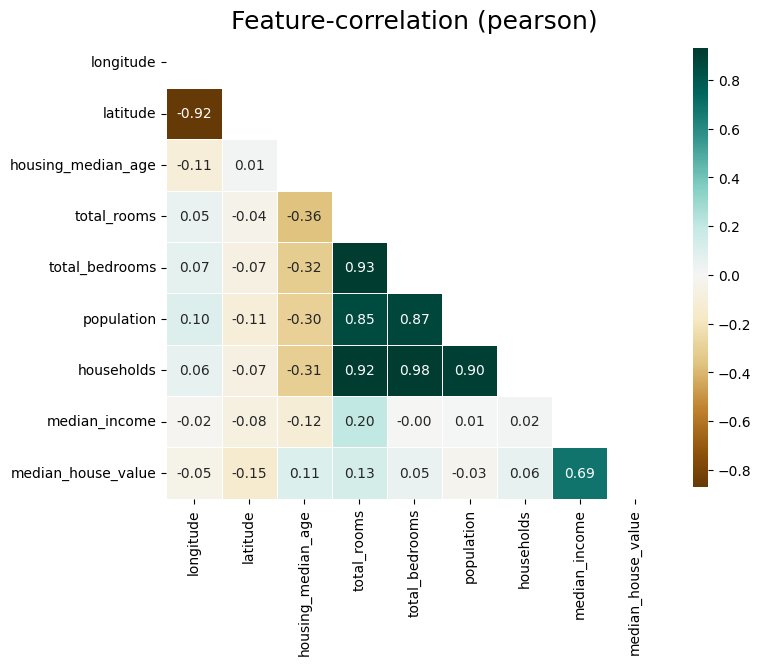

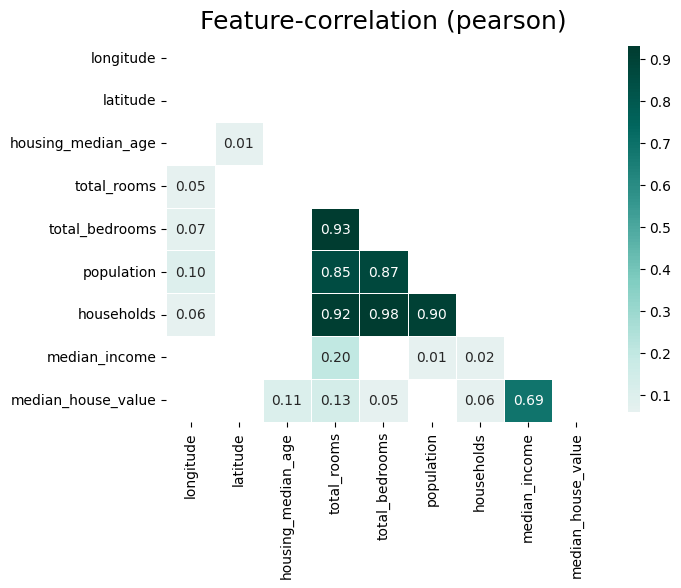

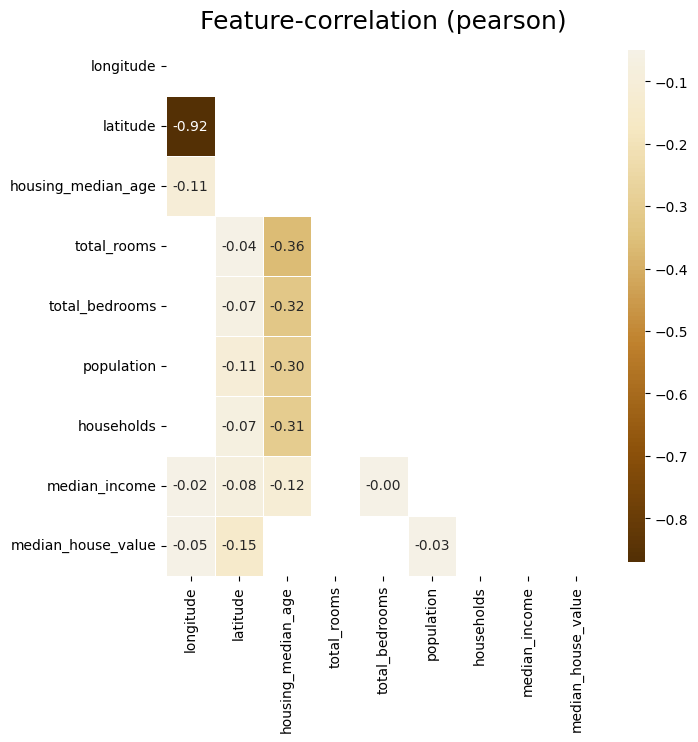

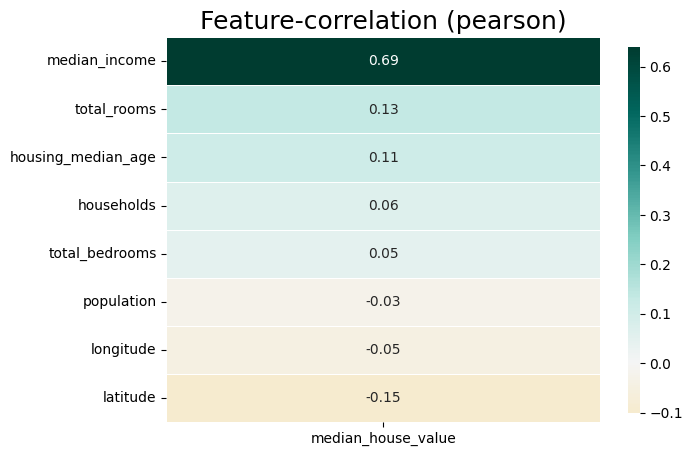

In [16]:
##############################################################################
             # Análise estatística dos dados - correlações #

# Extraindo variáveis categóricas e numéricas do conjunto de dados
cat_vars = [var for var in housing.columns if housing[var].dtype == 'object']
num_vars = [var for var in housing.columns if housing[var].dtype in ['int','float64']]

# Fazendo a estimativa da matriz de correlação das variáveis do dataframe
# correlation_matrix = housing[num_vars].corr()
# correlation_matrix

# Correlation Matrix com klib
klib.corr_plot(housing, figsize = (8,6), annot = True)
klib.corr_plot(housing, split='pos', figsize = (7,5))
klib.corr_plot(housing, split='neg', figsize = (7,7))
klib.corr_plot(housing, target='median_house_value', figsize = (7,5))


In [17]:
##############################################################################
       # Análise exploratória de dados - visualização #
    
# Plotly Visualization
fig_plotly_scatter = px.scatter(housing, 
                               x = "median_income", 
                               y = "median_house_value", 
                               color = "median_house_value", 
                               color_continuous_scale=px.colors.sequential.Jet,
                               size = "median_income", size_max=30)

fig_plotly_scatter.update_layout(template=template)
fig_plotly_scatter.update_layout(title="Exploratory Data Analysis - (Median Income and Median House Values)",
                                xaxis_title="Median Income)",
                                yaxis_title="Median House Values",
                                legend_title="Median House Values",
                                # width=500,
                                # height=700,
                                font=dict(size=15)
                               )

In [ ]:
##############################################################################
             # Engenharia de features (combinação de atributos) #

<Axes: title={'center': 'Feature-correlation (pearson)'}>

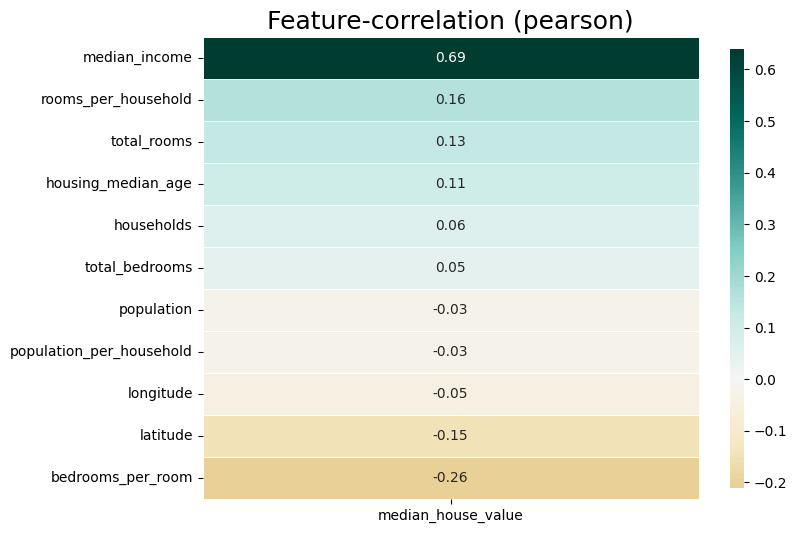

In [18]:
# =============================================================================
# Combinação de Atributos

# Nesse ponto, podemos fazer a combinação de atributos (fase de engenharia de
# características) a fim de construir features que sejam estatisticamente
# relevantes para a etapa de modelagem preditiva

# Um bom critério aqui é: i) encontrar features que tenham alta correlação (positiva
# ou negativa) com a variável target (saída)) 

# No caso de Housing Prices: 

# Razão de banheiros e cômodos 
housing['bedrooms_per_room'] = housing['total_bedrooms']/housing['total_rooms']
# Razão de total_rooms/household (rooms/domicílios)
housing['rooms_per_household'] = housing['total_rooms']/housing['households']
# Razão de população / domílicios
housing['population_per_household'] = housing['population']/housing['households']

# Obtendo a matriz de correlação com as novas features construídas
num_vars = [var for var in housing.columns if housing[var].dtype in ['int','float64']]
correlation_matrix_new = housing[num_vars].corr()
correlation_matrix_new['median_house_value'].sort_values(ascending = False)

# Análise:
# Nota-se que a feature rooms per household tem uma correlação relativamente
# significativa com median_house_value. O mesmo pode-ser afirmar sobre a 
# característica bedrooms_per_room no sentido negativo do coeficiente de 
# correlação
klib.corr_plot(housing, target='median_house_value', figsize=(8,6))



----------------------------------------------------------------------------------------------------------------

### **Step 7** : Preparação dos dados para modelagem 
  - 7.1 Princípios de design do scikit-learn
  - 7.2 Limpeza de dados (data cleaning)
  - 7.3 Detecção e análise de outliers nos dados 
  - 7.4 Processamento de features categóricas com codificadores (encoding)
  - 7.5 Normalizações e padronizações (feature scaling)

----------------------------------------------------------------------------------------------------------------

In [19]:
# ======================================================
# Preparação dos Dados para Modelagem (Machine Learning)

# Quais são as principais razões para preparação de dados com funções para ML?

# i)   Isso permitirá a reprodução de transformações mais facilmente em qualquer
# novo conjunto de dados

# ii)  Isso permitirá a construção de uma biblioteca de funções de transformação
# que poderemos utilizar em projetos futuros

# iii) Poderemos (principalmente) usar essas funções para transformar os novos dados
# antes de alimentarmos/utilizarmos a modelagem preditiva*
# (explorar a diferença entre: pipeline modeling and model)

# iv)  Poderemos usar essas funções para construir novas versões (incluindo alterações)
# para que transformações diferentes possam ser pesquisadas/exploradas e testadas sobre os dados

# Criando uma cópia do dataset de treino, considerando a amostragem por estratos 
# e removendo a variável target median_house_value
housing = strat_train_set.drop("median_house_value", axis = 1)

# Criando uma série para a variável de saída (taget) 
housing_labels = strat_train_set["median_house_value"].copy()

# Resetando o índice do dataframe 
# housing = housing.reset_index(drop=True)

----------------------------------------------------------------------------------------------------------------

### **Step 7.2** : Limpeza de dados (data cleaning)
 - Opções de Limpeza e Estratégias de Imputação 
    - opção i)  fazendo o drop apenas dos valores faltantes
    - opção ii) fazendo o drop da variável total_bedrooms
    - opção iii) escolhendo a melhor estratégia de imputação (e.g., mediana)  

----------------------------------------------------------------------------------------------------------------

/var/folders/t1/n2qm1wg173l0v4x5rkq9c8v00000gn/T/ipykernel_2634/1423457210.py:116: FutureWarning:

A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.





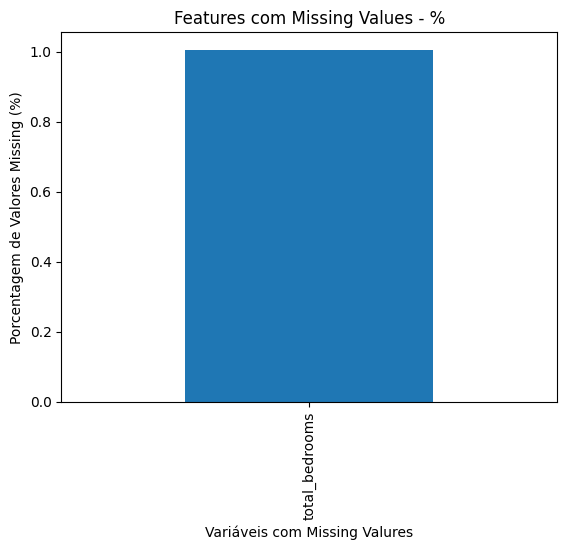

In [20]:
# =================================
# Limpeza dos Dados (Data Cleaning)

# Como podemos checar se uma feature possui valores faltantes (NA) ou missing values?
housing.isnull().values.any()

# Quais seriam as features que possuem missing values?
# [var for var in housing.columns if housing[var].isnull().sum() > 0]

# housing_teste = housing.reset_index()

# Variável total bedrooms
# housing['total_bedrooms'].isnull().values.any()

# Quais seriam os índices em que os missing values estariam posicionados?

# List comprehension - buscar os índices em que existem valores nulos
# idx_null = [idx for idx,element in enumerate(housing['total_bedrooms']) if np.isnan(element)]
# idx_null

# Uso da bibliote klib para verificação dos dados faltantes
# import klib
# klib.missingval_plot(housing)

# Variável check_na: confirma a existência de valores faltantes no dataset
check_na = housing.isnull().values.any()
check_na

# Função para geração de visualização da proporção dos dados faltantes
def missing_values_graph(df, check_na):
    """
    Essa função gera a visualização das proporções de missing values em um 
    conjunto de dados (dataframe)
    
    Parameters
    ----------
    df : dataframe pandas de entrada
    check_na : variável booleana (True/False) que indica a existência de dados
    faltantes no dataframe

    Returns
    -------
    vars_com_na, vars_sem_na
    """
    # Check (verificação de valores missing) 
    if check_na == True: 
        # Capturando os nomes das features que possuem/não possuem missing values
        vars_com_na = [var for var in df.columns if df[var].isnull().sum() > 0]
        vars_sem_na = [var for var in df.columns if var not in vars_com_na]
        # Percentual de valores faltantes no conjunto de dados
        porcentagem_na_values = df[vars_com_na].isnull().mean().sort_values(ascending=False)*100
        porcentagem_na_values.plot.bar()
        plt.ylabel('Porcentagem de Valores Missing (%)')
        plt.xlabel('Variáveis com Missing Valures')
        plt.title('Features com Missing Values - %')
    return vars_com_na, vars_sem_na
    
# Aplicação da Função missing_values_graph
vars_com_na, vars_sem_na = missing_values_graph(housing, check_na)

# ------------------------------------------------------------------
# opção i) Soft Clearning: função para aplicação de limpeza de dados 
def soft_cleaning(df):
    """
    Essa função realiza o soft cleaning sobre o dataframe de entrada, 
    removendo as linhas que possuem missing values.
    
    Parameters
    ----------
    df : dataframe pandas de entrada

    Returns
    -------
    df_soft_cleaning : dataframe com limpeza tipo soft cleaning

    """
    # Checagem de existência de missing values
    check_na = df.isnull().values.any()
    if check_na == True:
        df_soft_cleaning = df.dropna(axis=0)
    else: print('Dataframe sem missing values')
    return df_soft_cleaning

housing_soft_cleaning = soft_cleaning(housing)

# --------------------------------------------------------------------------
# opção ii) Hard Clearning: função para drop das features com missing values
def hard_cleaning(df):
    """
    Essa função realiza o hard cleaning sobre o dataframe de entrada, 
    removendo as features que possuem, pelo menos, um missing value.
    
    Parameters
    ----------
    df : dataframe pandas de entrada

    Returns
    -------
    df_hard_cleaning : dataframe com limpeza tipo hard cleaning
    """
    # Checagem de existência de missing values
    check_na = df.isnull().values.any()
    if check_na == True:
        # Identificação de features que possuem missing values
        # vars_com_na = df.columns[df.isna().any()]
        # Selecionando features
        df_hard_cleaning = df[df.columns[~df.isna().any()]]
    else: print('Data sem missing values')
    return df_hard_cleaning

housing_hard_cleaning = hard_cleaning(housing)

# ----------------------------------------------------------------------
# opção iii) escolhendo a melhor estratégia de imputação (e.g., mediana)
median = housing["total_bedrooms"].median() 
housing["total_bedrooms"].fillna(median, inplace=True)
housing.isnull().values.any()

# Utilizando o simpleimputer
from sklearn.impute import SimpleImputer
# Criando o imputer com estratégia mediana
imputer = SimpleImputer(strategy="median")
# Uma vez que a mediana é computada para features numéricas, vamos fazer o 
# drop da feature ocean_proximity
housing_num = housing.drop(["ocean_proximity","income_categorical"], axis=1)
# Ou podemos utilizar list comprehension para detectar as features numéricas
# [var for var in housing.columns if housing[var].dtype == 'float64']
# Aplicando o imputer no dataframe completo
imputer.fit(housing_num)
# Valores de mediana para cada feature
# imputer_stats = imputer.statistics_
# Fazendo o comparativo
# housing_num.median().values

# Usamos o método transform para aplicar o imputador que conhece a mediana dos
# dados, ou seja, estamos introduzindo o valor mediano de cada feature nos 
# respectivos registros faltantes das features 
X = imputer.transform(housing_num)
# É importante notar que o resultado da imputação nos fornece um array NumPy
type(X)
# Podemos fazer a geração do dataframe com o resultado do imputer
housing_tr = pd.DataFrame(X,columns=housing_num.columns,index = housing_num.index)


----------------------------------------------------------------------------------------------------------------

### **Step 7.3** : Detecção e análise de outliers nos dados
 - https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.IsolationForest.html
 - Importante: veja que a incorporação de um detector de anomalia como parte do processo de preparação de dados é um ponto de relevância, especialmente se refletirmos sobre os passos a serem implementados nas pipelines em produção

----------------------------------------------------------------------------------------------------------------

In [21]:
# ================================================
# Remoção de Outliers com Isolation Forest (Model)

# Anomaly Detection Model (IF)
from sklearn.ensemble import IsolationForest
# Treinamento do Modelo iForest (default configuration)
isolation_forest = IsolationForest(random_state=42)
# Aplicando o modelo sobre X (resultado da limpeza de dados com imputação)
outlier_pred = isolation_forest.fit_predict(X)
# Outlier Removal
# housing = housing.iloc[outlier_pred == 1]
# housing_labels = housing_labels.iloc[outlier_pred == 1]


----------------------------------------------------------------------------------------------------------------

### **Step 7.4** : Processamento de features categóricas com codificadores (encoding)

----------------------------------------------------------------------------------------------------------------

In [22]:
# ===============================================================
# Processamento Features Categóricas com Codificadores (Encoding)

# Extraindo variáveis categóricas e numéricas do conjunto de dados
cat_vars = [var for var in housing.columns if housing[var].dtype == 'object']
cat_vars = ['ocean_proximity']
housing_cat = housing[["ocean_proximity"]]
housing_cat = housing[cat_vars]
# housing["income_categorical"] = housing["income_categorical"].astype('object')
# housing = housing.drop(['income_categorical'],axis=1)
housing['ocean_proximity'].unique()

# --------
# Encoding 

# Vamos aplicar o ordinal encoder para fazer a codificação (encoding) da 
# variável ocean_proximity
from sklearn.preprocessing import OrdinalEncoder
# Criando encoder (instância da classe)
ordinal_encoder = OrdinalEncoder()
# Fazendo o fit (estimação de parâmetros) e transform (transformando os dados)
housing_cat_encoded = ordinal_encoder.fit_transform(housing_cat)
# housing_cat_encoded[:10]

# Lista de categorias
# ordinal_encoder.categories_

# É importante ressaltar que estamos converterndo categorias em números e, com isso desejamos que duas categorias próximas também o sejam na sua representação numérica.
# E.g., veja que a categoria 0 (ocean) é muito mais próxima de 4 (near ocean)
# Nesses casos, podemos fazer o one-hot-encoding
from sklearn.preprocessing import OneHotEncoder
cat_encoder = OneHotEncoder(sparse_output=False)
housing_cat_1hot = cat_encoder.fit_transform(housing_cat)
# housing_cat_1hot
# A saída é uma matriz esparsa (sparse matrix) - sparse matrix only stores 
# the location of the nonzero elements
# Podemos converter para um array NumPy
# housing_cat_1hot_np = housing_cat_1hot.toarray()

# housing_cat_1hot
# housing_cat_1hot_np
# Lista de atributos das categorias
cat_encoder.categories_[0]

# Existe uma função no pandas - chamada get.dummies(), que também converte
# uma variável categórica em uma feature one-hot 
df_test = pd.DataFrame({"ocean_proximity": ["INLAND", "NEAR BAY"]})
pd.get_dummies(df_test)

# Ponto importante: a vantagem em se utilizar o encoder é que esse (encoder)
# guarda o mapeamento de codificação aprendido, algo essencial para colocarmos
# o codificador em uma pipeline de prod, que recebe novos dados para codificação
# e posterior geração de resultados. 

# Aqui aplicamos o encoder que foi treinado com a codificação
cat_encoder.transform(df_test)

# Aqui, já utilizamos o get_dummies com uma nova categoria e vemos que ele
# cria e adiciona novas categorias 
df_test_unknown = pd.DataFrame({"ocean_proximity": ["<2H OCEAN", "ISLAND"]})
pd.get_dummies(df_test_unknown)

# O Encoder é mais versátil, isto é, frente à uma categoria desconhecida, 
# ele gera um resultado de nulos para as colunas one-hot
cat_encoder.handle_unknown = "ignore"
cat_encoder.transform(df_test_unknown)

# Outros tipos de codificadores categóricos do scikit-learn
# https://github.com/scikit-learn-contrib/category_encoders

# Lista de nome das features
cat_encoder.feature_names_in_
cat_encoder.get_feature_names_out()
df_output = pd.DataFrame(cat_encoder.transform(df_test_unknown),
                         columns=cat_encoder.get_feature_names_out(),
                         index=df_test_unknown.index)

df_output

,ocean_proximity_<1H OCEAN,ocean_proximity_INLAND,ocean_proximity_ISLAND,ocean_proximity_NEAR BAY,ocean_proximity_NEAR OCEAN
0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,1.0,0.0,0.0


----------------------------------------------------------------------------------------------------------------

### **Step 7.5**: Normalizações e padronizações (feature scaling) 

----------------------------------------------------------------------------------------------------------------

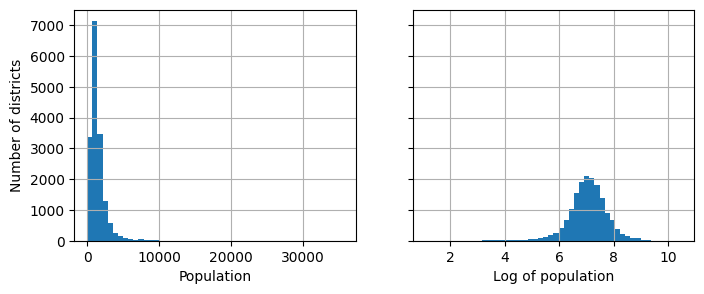

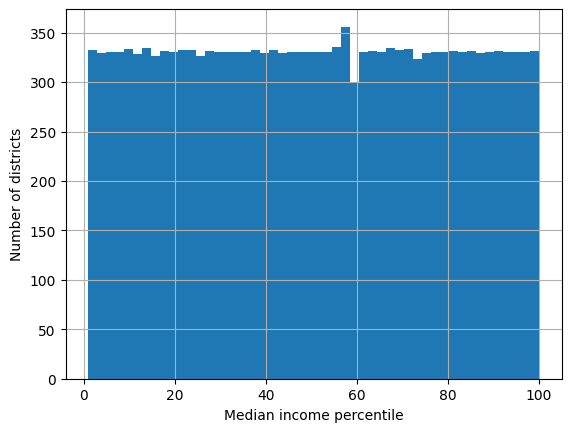

<class 'pandas.core.frame.DataFrame'>
Index: 16512 entries, 3225 to 9208
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           16512 non-null  float64
 1   latitude            16512 non-null  float64
 2   housing_median_age  16512 non-null  float64
 3   total_rooms         16512 non-null  float64
 4   total_bedrooms      16512 non-null  float64
 5   population          16512 non-null  float64
 6   households          16512 non-null  float64
 7   median_income       16512 non-null  float64
 8   ocean_proximity     16512 non-null  object 
 9   income_categorical  16512 non-null  object 
dtypes: float64(8), object(2)
memory usage: 1.4+ MB


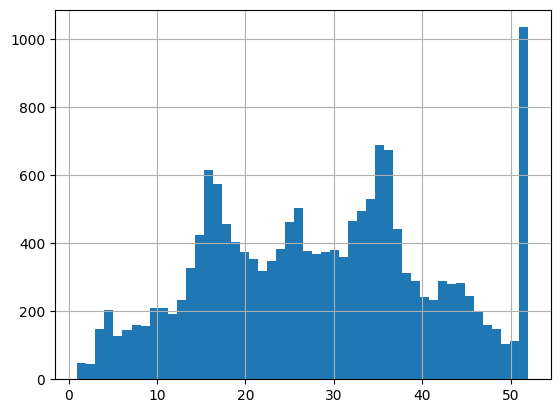

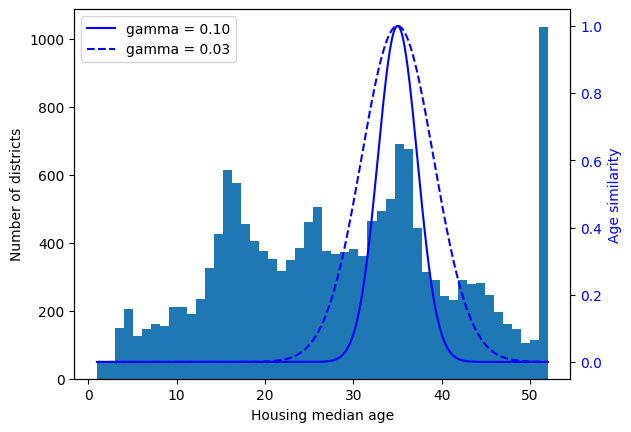

In [23]:
# ===============================================
# Normalizações e padronizações (feature scaling) 

# - Scaling
#   - Min-Max
#   - Standartization
# - Heavy-Tail distributions
# - Dicretização (buckets)
# - Multimodalidade
# - Radial Basis Functions
# - Transformações na variável target (y)

# Feature scaling com Min-Max:
from sklearn.preprocessing import MinMaxScaler
min_max_scaler = MinMaxScaler(feature_range=(-1, 1))
housing_num_min_max_scaled = min_max_scaler.fit_transform(housing_num)
# Feature scaling com Padronização (standartization):
from sklearn.preprocessing import StandardScaler
std_scaler = StandardScaler()
housing_num_std_scaled = std_scaler.fit_transform(housing_num)

# Quando a distribuição estatística da feature é heavy-tail (i.e., quando os
# valores muito distantes da média não são exponencialmente raros), tanto 
# min-max como standartization irão concentrar muitos valores da distribuição
# em um range pequeno, o que (em geral) dificulta a detecção de padrões em ML

# ----------------------------------------------------------------------------
# heavy-tailed distributions are probability distributions whose tails are not 
# exponentially bounded: 
# that is, they have heavier tails than the exponential distribution
# ----------------------------------------------------------------------------

# Abordagens para lidar com distribuições de caudas pesadas
# - transformação log
# - bucketizing (discretização com percentis)
fig, axs = plt.subplots(1, 2, figsize=(8, 3), sharey=True)
housing["population"].hist(ax=axs[0], bins=50)
housing["population"].apply(np.log).hist(ax=axs[1], bins=50)
axs[0].set_xlabel("Population")
axs[1].set_xlabel("Log of population")
axs[0].set_ylabel("Number of districts")
plt.show()

# bucketizing: usando percentis para discretizar variáveis. 
# extra code – just shows that we get a uniform distribution
percentiles = [np.percentile(housing["median_income"], p)
               for p in range(1, 100)]
flattened_median_income = pd.cut(housing["median_income"],
                                 bins=[-np.inf] + percentiles + [np.inf],
                                 labels=range(1, 100 + 1))
flattened_median_income.hist(bins=50)
plt.xlabel("Median income percentile")
plt.ylabel("Number of districts")
plt.show()
# Note: incomes below the 1st percentile are labeled 1, and incomes above the
# 99th percentile are labeled 100. This is why the distribution below ranges
# from 1 to 100 (not 0 to 100).

# Estamos dividindo os valores da feature em buckets de igual tamanho e 
# substituindo cada valor da feature pelo índice do bucket correspondente, 
# baseado em percentis. 

# ----------------------------------------------
# Multimodalidade nas Distribuições Estatísticas

# Usar a discretização também é útil quando existe multimodalidade na 
# distribuição estatística da feature. Além disso, discretizar e tratar
# cada Bucket ID como categoria (aplicando OneHot Encoding nos resultados)
# também é uma forma de lidar com multimodalidade nas distribuições
housing.info()
housing.housing_median_age.hist(bins=50)

# ----------------------
# Radial Basis Functions

# Outra abordagem para lidar com a multimodalidade nas distribuições consiste 
# em criar uma feature, que representa a similaridade entre os valores 
# da feature com alguma estatística (e.g., moda).
# Para isso, usamos função de medição de similaridade como:
# - RBF (radial basis function)
# - RBF gaussianos são muito utilizados na medição de similaridade entre 
# dois valores distintos

# Exemplo: exp(-gamma*(x - 35)**2)) - Gaussian RBF que mede a similaridade
# entre os valores da feature com 35, considerando o hiperparametro gamma 
# (que quantifica o decaimento da exponencial)
# https://scikit-learn.org/stable/modules/generated/sklearn.metrics.pairwise.rbf_kernel.html#sklearn.metrics.pairwise.rbf_kernel

from sklearn.metrics.pairwise import rbf_kernel
age_simil_35 = rbf_kernel(housing[["housing_median_age"]], [[35]], gamma=0.1)

ages = np.linspace(housing["housing_median_age"].min(),
                   housing["housing_median_age"].max(),
                   500).reshape(-1, 1)
gamma1 = 0.1
gamma2 = 0.03
rbf1 = rbf_kernel(ages, [[35]], gamma=gamma1)
rbf2 = rbf_kernel(ages, [[35]], gamma=gamma2)

fig, ax1 = plt.subplots()
ax1.set_xlabel("Housing median age")
ax1.set_ylabel("Number of districts")
ax1.hist(housing["housing_median_age"], bins=50)

ax2 = ax1.twinx()  # create a twin axis that shares the same x-axis
color = "blue"
ax2.plot(ages, rbf1, color=color, label="gamma = 0.10")
ax2.plot(ages, rbf2, color=color, label="gamma = 0.03", linestyle="--")
ax2.tick_params(axis='y', labelcolor=color)
ax2.set_ylabel("Age similarity", color=color)
plt.legend(loc="upper left")
plt.show()

# ---------------------------------
# Transformações na Variável Target

# Conceito de inversão das transformações (aplicado na variável target)
from sklearn.linear_model import LinearRegression

target_scaler = StandardScaler() # feature scaling
scaled_labels = target_scaler.fit_transform(housing_labels.to_frame()) # scaling

model = LinearRegression() # model instance (simple linear regression)
model.fit(housing[["median_income"]], scaled_labels) # training
some_new_data = housing[["median_income"]].iloc[:5]  # pretend this is new data

scaled_predictions = model.predict(some_new_data) # predictions (scaled)
predictions = target_scaler.inverse_transform(scaled_predictions) # predictions (transform)

# Utilizando o TransformedTargetRegressor
from sklearn.compose import TransformedTargetRegressor

model = TransformedTargetRegressor(LinearRegression(),
                                   transformer=StandardScaler())
model.fit(housing[["median_income"]], housing_labels)
predictions = model.predict(some_new_data)


----------------------------------------------------------------------------------------------------------------

### **Step 8**: Custom Transformers (Transformadores)

----------------------------------------------------------------------------------------------------------------

In [24]:
# ===================
# Custom Transformers

# Embora o scikit-learn ofereça diversos transformadores, a possibilidade
# de customização de transformadores pode ser útil, permitindo que tarefas
# específicas como limpeza e combinação de atributos sejam customizadas;

# - Exemplos de Transformadores
#  - Transformadores simples (mini exemplo log transform)
#  - Transformadores simples para geração de features (idade das casas)
#  - Transformadores simples para geração de features (distância geográfica)
#  - Transformadores simples para geração de features (razões entre variáveis)
#  - Custom Transformer - KMeans (Clusterização) 

# ----------------------------------------------------------------------------
# - Transformadores simples (mini exemplo log transform)

# Para transformações que não exigem estimação (treinamento), podemos 
# criar transformadores simples
from sklearn.preprocessing import FunctionTransformer
log_transformer = FunctionTransformer(np.log, inverse_func=np.exp)
log_pop = log_transformer.transform(housing[["population"]])

# ----------------------------------------------------------------------------
# - Transformadores simples para geração de features (idade das casas)

# Usando transformadores com o rbf kernel (radial basis function), que 
# construirmos para geração de features de similaridade:

# - repare que podemos usar hyperparameters nas funções de transformação
rbf_transformer = FunctionTransformer(rbf_kernel,
                                      kw_args=dict(Y=[[35.]], gamma=0.1))
age_simil_35 = rbf_transformer.transform(housing[["housing_median_age"]])

# ----------------------------------------------------------------------------
# - Transformadores simples para geração de features (distância geográfica)

# Uso do transformador para construção de feature para medição de similaridade
# (geográfica) usando os dados de latitute/longitude

sf_coords = 37.7749, -122.41 # coordenadadas (dataset geolocalizado)
# transformador com rbf_kernel aplicado aos valores de lat/long
sf_transformer = FunctionTransformer(rbf_kernel,
                                     kw_args=dict(Y=[sf_coords], gamma=0.1))
sf_simil = sf_transformer.transform(housing[["latitude", "longitude"]])


# ----------------------------------------------------------------------------
# - Transformadores simples para geração de features (razões entre variáveis)
ratio_transformer = FunctionTransformer(lambda X: X[:, [0]] / X[:, [1]])
ratio_transformer.transform(np.array([[1., 2.], [3., 4.]]))


# ============================================================================
# Se quisermos construir transformadores que exigem treinamento (fit), temos:
# - construir uma classe customizada
# - implementar os pilares do scikit-learn (fit, transform, predict)
# - add TransformerMixin como base class, habilita o uso do fit_transform
# - add BaseEstimator como base class, habilita dois métodos extras:
#   - get_params()
#   - set_params()

from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.utils.validation import check_array, check_is_fitted

class StandardScalerClone(BaseEstimator,TransformerMixin):
    
    def __init__(self, with_mean=True):
        self.with_mean = with_mean # no *args or **kargs
        
    def fit(self, X, y=None): # y is required even though we don't use it
        X = check_array(X)    # check that X is an array (finit float values)
        self.mean_  = X.mean(axis=0)     # mean estimation
        self.scale_ = X.std(axis=0)      # std estimation
        self.n_features_in_ = X.shape[1] # every estimator stores this in fit()
        return self # always return self
    
    def transform(self,X):
        check_is_fitted(self) # looks for learned attributes 
        X = check_array(X)
        assert self.n_features_in_ == X.shape[1]
        if self.with_mean:
            X = X - self.mean_
        return X/self.scale_
    
# ----------------------------------------------------------------------------
# Alguns pontos importantes:

# - o pacote sklearn.utils.validation traz várias funções úteis para 
# testes dos dados de entrada, importante para códigos em produção

# - os objetos pipeline do sklearn existem a especificação de X e y no método
# fit() (ainda que usemos somente as classes para preparação dos dados X)

# - todos os estimadores do scikit-learn configuram o n_features_in_ no 
# método fit(), garantindo a passagem do número exato de features para 
# os outros métodos transform() e predict()

# - O método fit() deve retornar self ()

# - Importante notar que a implementação não está totalmente completa. 
# Todos os estimadores devem considerar feature_names_in no método fit()
# quando dataframes são usados. Além disso, transformadores devem prover
# o método get_features_names_out(), bem como inverse_transform (quando a 
# transformação foi reversível). 
# ----------------------------------------------------------------------------


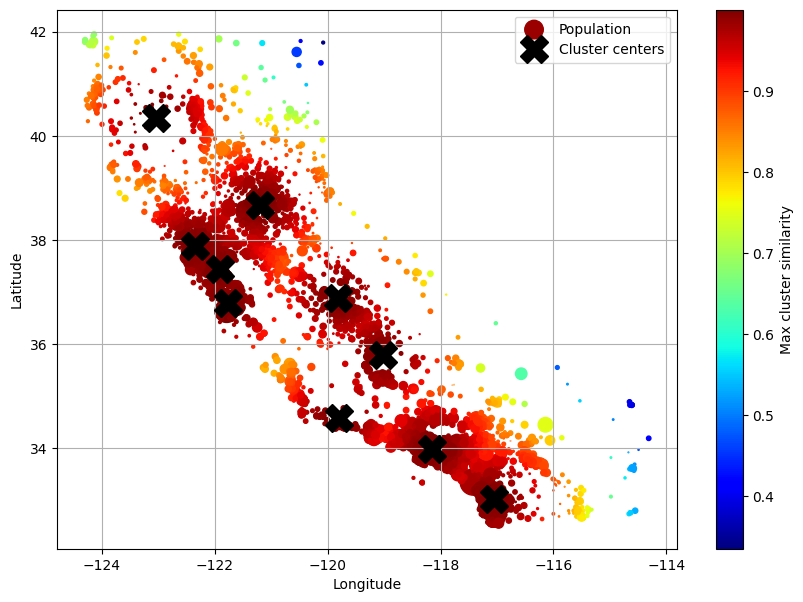

In [25]:
# ----------------------------------------------------------
# Implementação do Custom Transformer - Clusterização KMeans

# Um transformador customizado pode conter diferentes estimadores (fit) em
# sua implementação. Abaixo, temos um custom transformer que realiza o 
# treinamento de um clusterizador sobre os dados (detecção de grupos)
# e o kernel RBF para determinar a similaridade entre os dados e os centros
# dos grupos (clusters) detectados.

from sklearn.cluster import KMeans

class ClusterSimilarity(BaseEstimator, TransformerMixin):
    
    def __init__(self, n_clusters = 10, gamma = 0.1, random_state=None):
        self.n_clusters   = n_clusters
        self.gamma        = gamma
        self.random_state = random_state
        
    def fit(self, X, y=None, sample_weight=None):
        self.kmeans_ = KMeans(self.n_clusters,random_state=self.random_state)
        self.kmeans_.fit(X,sample_weight=sample_weight)
        return self
    
    def transform(self,X):
        return rbf_kernel(X,self.kmeans_.cluster_centers_,gamma=self.gamma)
    
    def get_feature_names_out(self, names=None):
        return [ f"Cluster {i} similarity" for i in range(self.n_clusters) ]
        
# Aplicando o custom transformer
cluster_simil = ClusterSimilarity(n_clusters=10,gamma=0.1,random_state=42)
similarities  = cluster_simil.fit_transform(housing[['latitude','longitude']],
                                            sample_weight=housing_labels)

similarities[:3].round(2)

# Visualização dos clusters (centros) e similaridades (feature)

# a feature gerada por meio do custom transformer é baseada em um processo 
# de clusterização (KMeans), que é aplicado sobre os valores de lat/long,
# ponderados pelo valor do preço dos casas. 

# A clusterização retorna os centros, usados em uma função de similaridade
# RBF entre: valores de lat/long dos distritos e os centros de lat/long

# extra code – this cell generates Figure 2–19
housing_renamed = housing.rename(columns={
    "latitude": "Latitude", "longitude": "Longitude",
    "population": "Population",
    "median_house_value": "Median house value (ᴜsᴅ)"})
housing_renamed["Max cluster similarity"] = similarities.max(axis=1)

housing_renamed.plot(kind="scatter", x="Longitude", y="Latitude", grid=True,
                     s=housing_renamed["Population"] / 100, label="Population",
                     c="Max cluster similarity",
                     cmap="jet", colorbar=True,
                     legend=True, sharex=False, figsize=(10, 7))

plt.plot(cluster_simil.kmeans_.cluster_centers_[:, 1],
         cluster_simil.kmeans_.cluster_centers_[:, 0],
         linestyle="", color="black", marker="X", markersize=20,
         label="Cluster centers")
plt.legend(loc="upper right")
plt.show()


----------------------------------------------------------------------------------------------------------------

### **Step 9**: Pipelines de Transformação

----------------------------------------------------------------------------------------------------------------

In [26]:
# ========================
# Transformation Pipelines

# Até esse ponto, podemos mencionar que as transformações nos dados são
# essenciais na prática de modelagem e consiste em uma sequência de steps
# que devem ser executados em uma ordem específica. 

# O Scikit-learn fornece a classe Pipelines para ajudar nessa tarefa.

# Pipelines de Transformação
# - Exemplo de pipeline (processamento de variáveis numéricas)
# - Usando make_pipeline do scikit-learn
# - ColumnTransformer - Lidando com diferentes pipelines 
# - System Design Pipeline 

# ----------------------------------------------------------------------------
# - Exemplo de pipeline (processamento de variáveis numéricas)
from sklearn.pipeline import Pipeline
from sklearn import set_config

# O construtor da pipeline recebe uma lista de tuplas de pares (name/estimator)
# para definir a sequência de steps da pipe. Os nomes não devem ter 
# double underscore __

# Outro ponto: os estimadores devem (todos) ser transformadores com o método
# fit_transform(), exceto o último estágio da pipe (que pode ser um preditor,
# um transformador ou um estimador)

num_pipeline = Pipeline([
                        ("impute", SimpleImputer(strategy='median')),
                        ("standardize",StandardScaler()),
                        ])        

set_config(display='diagram')
num_pipeline
        
# Em notebooks, a configuração sklearn.set_config(display='diagram') traz
# o desenho da pipeline na forma de um diagrama interativo, útil para a 
# visualização das sequências da pipeline

# Também é possível salvar o diagrama da pipeline
from sklearn.utils import estimator_html_repr
# Salvando o arquivo da pipeline
with open("pipeline.html", "w") as f:
    f.write(estimator_html_repr(num_pipeline))


housing_num_prepared = num_pipeline.fit_transform(housing_num)
housing_num_prepared[:2].round(2)

# ----------------------------------------------------------------------------
# Usando o make_pipeline do scikit-learn 

# No caso da ausência de nomes para os steps, podemos usar diretamente a 
# a classe make_pipeline, a qual assume os nomes das classes relacionadas
# com os transformadores usados na construção da pipeline. 

from sklearn.pipeline import make_pipeline
num_pipeline = make_pipeline(SimpleImputer(strategy="median"), StandardScaler())

housing_num_prepared = num_pipeline.fit_transform(housing_num)
housing_num_prepared[:2].round(2)

# obs: se múltiplos transformers possuem o mesmo nome, o sklearn atribui
# diferentes índices aos nomes de cada transformador

# Podemos usar o método get_feature_names_out() da pipeline para reconstruir
# o dataframe, incluindo o nome das features
df_housing_num_prepated = pd.DataFrame(housing_num_prepared, 
                                       columns = num_pipeline.get_feature_names_out(),
                                       index=housing_num.index)
    
# Outro ponto interessante é que pipelines (objetos) também permitem a 
# indexação
num_pipeline[0]
num_pipeline[1]
num_pipeline[:-1]

# Até agora, lidamos com variáveis numéricas e categóricas de forma separada.
# É interessante termos um único transformador capaz de lidar
# com todas as colunas de forma única, aplicando as transformações 
# específicas e necessárias a cada coluna. - Resposta: ColumnTransformer 

# ----------------------------------------------------------------------------
# ColumnTransformer and make_column_transformer
from sklearn.compose import ColumnTransformer

# Listas dos atributos (variáveis) numéricas e categóricas
num_attribs = ['longitude','latitude','housing_median_age','total_rooms',
               'total_bedrooms','population','households','median_income']
cat_attribs = ['ocean_proximity']

# pipeline relacionada à variáveis categóricas (ocean_proximity)
cat_pipeline = make_pipeline(
                             SimpleImputer(strategy='most_frequent'),
                             OneHotEncoder(handle_unknown='ignore')
                             )

# Organização das 3-tuplas para incorporação das diferentes pipelines
# process name | pipeline object | list of features
preprocessing = ColumnTransformer([
                                    ('num', num_pipeline, num_attribs),
                                    ('cat', cat_pipeline, cat_attribs)
                                  ])

# Importante: ao invés de passarmos o transformador, também podemos optar:
# - drop: caso exista o objetivo de remover a coluna 
# - passthrough - caso exista o objetivo de manter a coluna (sem transformação)

# Também é possível usar o objeto make_column_transformer, na situação em que 
# não quisermos tratar os nomes das variáveis na pipeline (igual o make_pipeline)

# Neste caso, usamos o make_column_selector para filtrar as colunas que são
# numéricas e categóricas
from sklearn.compose import make_column_selector, make_column_transformer

preprocessing = make_column_transformer(
                                        (num_pipeline, make_column_selector(dtype_include=np.number)),
                                        (cat_pipeline, make_column_selector(dtype_include=object)),
                                       )

# Aplicando a pipeline preprocessing e extraindo o dataframe
preprocessing_housing_num_cat_array = preprocessing.fit_transform(housing)
df_preprocessing_housing_num_cat = pd.DataFrame(preprocessing_housing_num_cat_array, 
                                                columns = preprocessing.get_feature_names_out(),
                                                index=housing.index)


In [27]:
# ================
# Pipeline Design

# Feature Engineering Steps

# - Imputação de valores faltantes com estratégia do valor mediana/moda para 
# as features numéricas e categóricas, respectivamente

# - A feature categórica será codificada com OneHotEncoding

# - A engenharia de variáveis será aplicada para geração das razões
#   - beddroms_ratio
#   - rooms_per_house
#   - people_per_house

# - A feature de similaridade de clusters também será incluída na pipeline

# - Features com caudas longas serão substituídas por log-transformations

# - A padronização (standard) será aplicada a todas as variáveis

# Função de razão entre variáveis
def column_ratio(X):
    return X[:,[0]]/X[:,[1]]  # razão entre variáveis


# Função para retorno de nomes das transformações
def ratio_name(function_transfomer, feature_names_in):    
    return ['ratio']


# Função para pipeline de geração de features de razão
def ratio_pipeline():
    return make_pipeline(
                         SimpleImputer(strategy="median"), # imputação da mediana
                         FunctionTransformer(column_ratio,feature_names_out=ratio_name), #nomes
                         StandardScaler() # padronização
                        )

# feature eng: pipeline de transformação logarítimica 
log_pipeline = make_pipeline(
                             SimpleImputer(strategy="median"), # imputação da mediana
                             FunctionTransformer(np.log, feature_names_out="one-to-one"),
                             StandardScaler()
                            )

# feature eng: pipeline de similaridade de clusters
cluster_simil = ClusterSimilarity(n_clusters=10, gamma=1., random_state=42)

# defaut_num_pipeline
defaut_num_pipeline = make_pipeline(
                                   SimpleImputer(strategy="median"), # imputação da mediana
                                   StandardScaler()
                                   )

# preprocessing: Column Transformer 
preprocessing = ColumnTransformer(    
                                 [
                                 ("bedrooms", ratio_pipeline(), ["total_bedrooms","total_rooms"]),
                                 ("rooms_per_house", ratio_pipeline(), ["total_rooms","households"]),
                                 ("people_per_house", ratio_pipeline(), ["population","households"]),
                                 ("log", log_pipeline, ["total_bedrooms","total_rooms","population",
                                                           "households","median_income"]),
                                 ("geo", cluster_simil, ["latitude","longitude"]),
                                 ("cat", cat_pipeline, make_column_selector(dtype_include=object))
                                 ],remainder=defaut_num_pipeline
                                 )



preprocessing_pipeline_output = preprocessing.fit_transform(housing)


df_preprocessing_pipeline = pd.DataFrame(preprocessing_pipeline_output, 
                                         columns = preprocessing.get_feature_names_out(),
                                         index=housing.index)


In [28]:
df_preprocessing_pipeline

,bedrooms__ratio,rooms_per_house__ratio,people_per_house__ratio,log__total_bedrooms,log__total_rooms,log__population,log__households,log__median_income,geo__Cluster 0 similarity,geo__Cluster 1 similarity,...,cat__ocean_proximity_INLAND,cat__ocean_proximity_ISLAND,cat__ocean_proximity_NEAR BAY,cat__ocean_proximity_NEAR OCEAN,cat__income_categorical_Alto,cat__income_categorical_Baixo,cat__income_categorical_Muito Alto,cat__income_categorical_Muito Baixo,cat__income_categorical_Médio,remainder__housing_median_age
3225,0.125151,-0.280129,0.060745,0.244055,0.144165,0.602138,0.267438,-1.057860,1.084762e-06,9.250732e-02,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.110777
12768,1.971457,1.283412,-0.037943,-1.418694,-2.024788,-2.807711,-2.742871,-3.019370,3.007616e-04,2.019545e-28,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,-0.923674
3070,-1.425240,-0.599939,-0.025277,-5.628149,-4.793006,-4.546509,-4.558115,-0.592299,4.077780e-16,3.612235e-01,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,-1.003248
2431,0.395989,-0.283008,0.100721,0.087005,-0.105728,0.489529,0.013159,-1.297359,1.534389e-04,3.559652e-03,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.747362
2492,1.160083,-0.695371,0.183839,-0.239399,-0.664296,0.484487,-0.245030,-1.095946,1.806954e-12,9.980678e-01,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.383948
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19090,-0.882692,0.541228,-0.036714,0.483554,0.819167,0.407403,0.491307,0.998147,2.481813e-09,6.764382e-02,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,-1.560260
13266,-0.690955,0.470601,0.054100,1.483590,1.693138,1.722996,1.421988,0.944149,1.289826e-13,9.014727e-01,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,-0.446235
2635,-0.783323,-0.002913,0.062625,0.009201,0.308116,0.600594,0.258925,1.019465,8.621338e-13,9.890594e-01,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,-0.684955
14885,0.076018,-0.248963,0.013221,-2.053809,-2.066912,-1.855607,-2.020831,-2.202012,7.984315e-01,1.091045e-14,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.588216


----------------------------------------------------------------------------------------------------------------

### **Step 9**: Machine Learning - Model Building

----------------------------------------------------------------------------------------------------------------

In [ ]:
# ==================================
# Machine Learning - Model Building

# Nós enquadramos o problema, coletamos e exploramos os dados, fizemos a 
# amostragem para separação dos dados de teste, escrevemos códigos de pipeline
# mais aderentes aos sistemas em produção, incluindo boas práticas do Skelarn,
# a fim de prepararmos os dados para modelagem

# Nesse ponto, vamos adicionar o modelo à nossa estrutura e, com isso, 
# construir uma pipeline de modelagem (= feature engineering + modeling)


# Adicionando o modelo à pipeline de feature engineering. Nesse momento, 
# estamos construindo o pipeline de modelagem, que engloba:
# - engenharia de features + modelo de ML
# from sklearn.linear_model import LinearRegression

# # Usando o make_pipeline (pipe simples com regressão linear)
# lin_reg_pipeline = make_pipeline(
#                                  preprocessing,
#                                  LinearRegression()
#                                 )

# # Treinamento da pipeline de modelagem
# lin_reg_pipeline.fit(housing,housing_labels)

# # Geração de predições a partir da pipeline de modelagem
# housing_predictions = lin_reg_pipeline.predict(housing)
# housing_predictions

# ----------------------------------------------------------------------------
# regressor = LinearRegression()

# pipeline = Pipeline([
#                      ('preprocessing', preprocessing),
#                      ('regressor',     regressor),
#                     ])


# pipeline.fit(housing,housing_labels)
# pipeline.predict(housing)

# ----------------------------------------------------------------------------
# Example of custom class for model regressor in scikit-learn

from sklearn.base import BaseEstimator, RegressorMixin
from sklearn.ensemble import RandomForestRegressor
from sklearn.utils.validation import check_X_y, check_array, check_is_fitted

# ============================================================================
# Modeling-Pipeline Building (CustomClass for model)

class CustomRandomForestRegressor(BaseEstimator, RegressorMixin):
    def __init__(self, n_estimators=100, max_depth=None, random_state=None, max_features=None):
        self.n_estimators = n_estimators
        self.max_depth = max_depth
        self.random_state = random_state
        self.max_features = max_features
        self.reg = RandomForestRegressor(n_estimators=n_estimators, max_depth=max_depth, random_state=random_state)

    def fit(self, X, y):
        # Fit the regressor
        self.reg.fit(X, y)
        return self

    def predict(self, X):
        # Perform regression
        pred = self.reg.predict(X) 
        return pred

# Pipeline regression composition (preprocessing + custom regressor)
pipeline_regression = Pipeline([
                                ('preprocessing', preprocessing),
                                ('regressor',     CustomRandomForestRegressor()),
                                ])

# Model Training and Predictions with Pipeline
pipeline_regression.fit(housing,housing_labels)
pipeline_regression.predict(housing)

# ============================================================================
# Modeling-Pipeline Tunning (using GridsearchCV)

from sklearn.model_selection import GridSearchCV

# Full pipeline processing configuration (preprocessing + customModel)
full_pipeline = Pipeline([
                            ("preprocessing", preprocessing),
                            ("random_forest", CustomRandomForestRegressor()),
                         ])

# Hyperparameter space of full pipeline
param_grid = [
                {'preprocessing__geo__n_clusters': [5, 8, 10],
                 'random_forest__max_features': [4, 6, 8]},
                {'preprocessing__geo__n_clusters': [10, 15],
                 'random_forest__max_features': [6, 8, 10]},
             ]

# Tunning with GridsearchCV to find the best setting of full pipeline parameters
full_pipeline_tunning = GridSearchCV(full_pipeline, param_grid, cv=3,
                           scoring='neg_root_mean_squared_error')

full_pipeline_tunning.fit(housing, housing_labels)

# Generate Predictionf using Full-Tunning-Pipeline
full_pipeline_tunning.predict(housing)
